# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

np.random.seed(99)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# The zip function is used to combine two iterables into a single iterable of tuples
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# citipy.nearest_city is a function that returns the nearest city based on the given lat and lng coor.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        print(i % 50 ==0)
        print(i>= 50)
        print( i, city)
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    #city_url = url + "&q=" + city + "appid=" + weather_api_key
    #f"{url}q={city}&appid={api_key}"
    weather_data= requests.get(city_url).json()
    print(weather_data)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{'coord': {'lon': 140.3, 'lat': 35.1333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 289.55, 'feels_like': 289.1, 'temp_min': 289.55, 'temp_max': 289.55, 'pressure': 1018, 'humidity': 71, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 4.8, 'deg': 61, 'gust': 6.68}, 'clouds': {'all': 100}, 'dt': 1683754031, 'sys': {'country': 'JP', 'sunrise': 1683747536, 'sunset': 1683797491}, 'timezone': 32400, 'id': 2112309, 'name': 'Katsuura', 'cod': 200}
Processing Record 1 of Set 1 | katsuura
{'coord': {'lon': 11.3581, 'lat': -2.4008}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.87, 'feels_like': 297.83, 'temp_min': 296.87, 'temp_max': 296.87, 'pressure': 1012, 'humidity': 97, 'sea_level': 1012, 'grnd_level': 997}, 'visibility': 10000, 'wind

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,katsuura,35.1333,140.3000,289.55,71,100,4.80,JP,1683754031
1,ndende,-2.4008,11.3581,296.87,97,53,0.66,GA,1683754032
2,ketchikan,55.3422,-131.6461,289.41,39,0,6.69,US,1683754033
3,puerto natales,-51.7236,-72.4875,276.76,87,94,0.51,CL,1683754034
4,miasskoye,55.2784,61.8905,275.64,70,50,2.10,RU,1683754035


In [8]:
# Make a directory for the output data
output_directory = "output_data"
os.mkdir(output_directory)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,289.55,71,100,4.80,JP,1683754031
1,ndende,-2.4008,11.3581,296.87,97,53,0.66,GA,1683754032
2,ketchikan,55.3422,-131.6461,289.41,39,0,6.69,US,1683754033
3,puerto natales,-51.7236,-72.4875,276.76,87,94,0.51,CL,1683754034
4,miasskoye,55.2784,61.8905,275.64,70,50,2.10,RU,1683754035


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

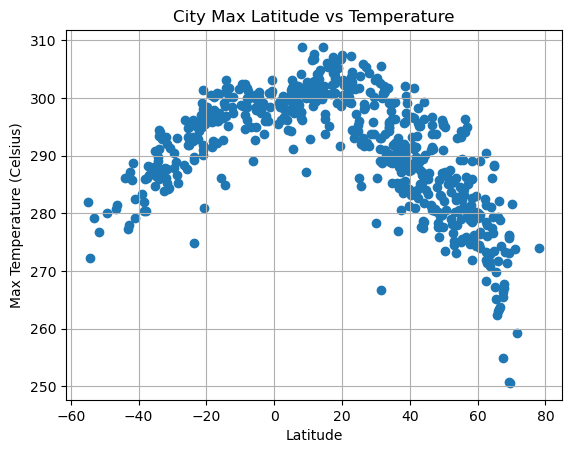

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

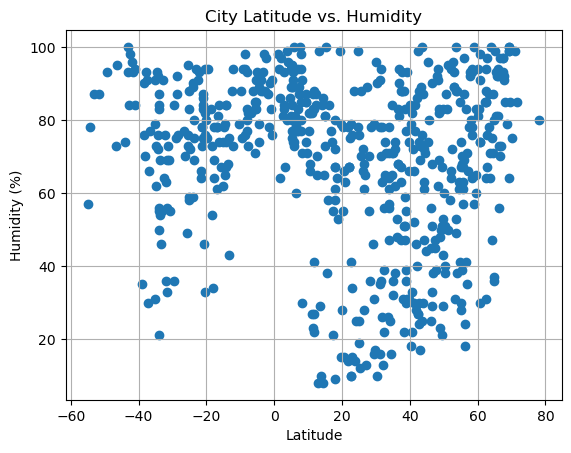

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

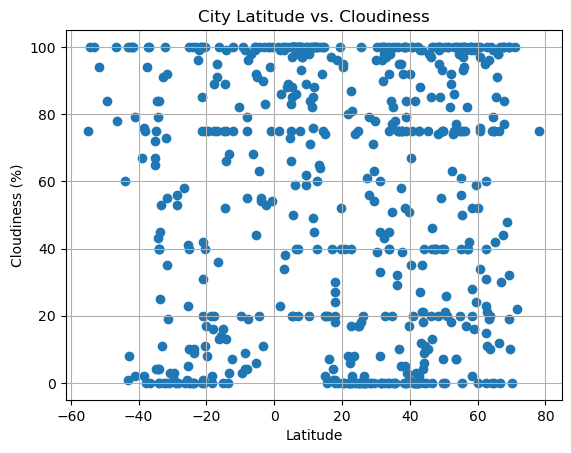

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

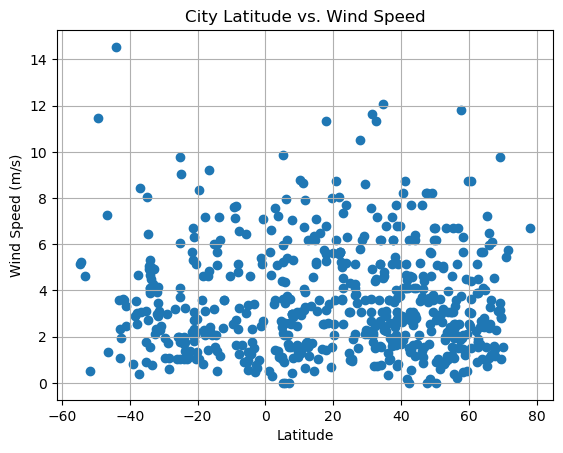

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def lin_regres_func(x, y, ylabel= "y", xlabel= "x"):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y +" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    mid_x= (min(x)+max(x))/2
    mid_y= (min(y)+max(y))/2
    plt.scatter(x,y)
    plt.plot(x, regress_values, "y-")
    plt.annotate(line_eq, (mid_x, mid_y), fontsize=12, color="black")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    return rvalue

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,katsuura,35.1333,140.3000,289.55,71,100,4.80,JP,1683754031
2,ketchikan,55.3422,-131.6461,289.41,39,0,6.69,US,1683754033
4,miasskoye,55.2784,61.8905,275.64,70,50,2.10,RU,1683754035
8,bilibino,68.0546,166.4372,273.26,85,100,2.29,RU,1683754039
9,bethel,41.3712,-73.4140,296.49,30,0,4.12,US,1683754040


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ndende,-2.4008,11.3581,296.87,97,53,0.66,GA,1683754032
3,puerto natales,-51.7236,-72.4875,276.76,87,94,0.51,CL,1683754034
5,rio grande,-32.0350,-52.0986,293.21,63,0,3.94,BR,1683754036
6,adamstown,-25.0660,-130.1015,295.07,59,100,9.79,PN,1683754037
7,port-aux-francais,-49.3500,70.2167,280.04,93,84,11.47,TF,1683754038


###  Temperature vs. Latitude Linear Regression Plot

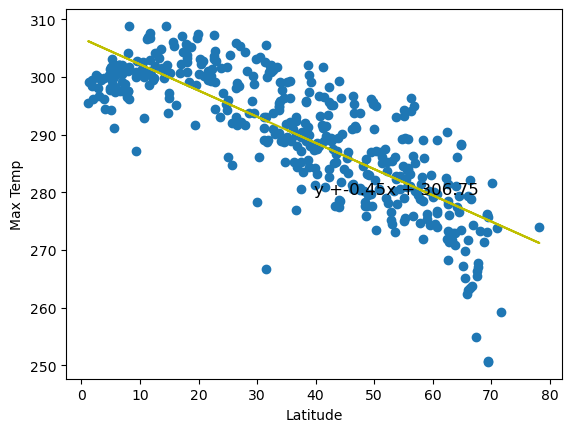

The r-value is: -0.81


In [21]:
# Linear regression on Northern Hemisphere
rvalue=lin_regres_func(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], ylabel="Max Temp", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

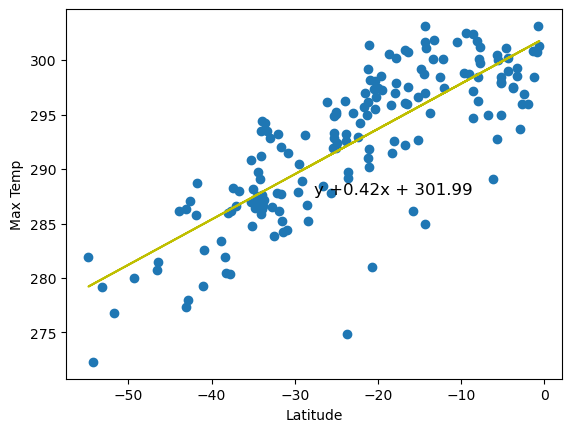

The r-value is: 0.81


In [22]:
# Linear regression on Southern Hemisphere
rvalue=lin_regres_func(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], ylabel="Max Temp", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

### Humidity vs. Latitude Linear Regression Plot

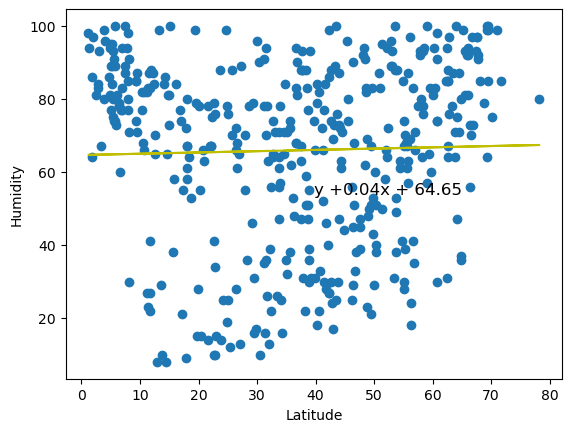

The r-value is: 0.03


In [27]:
# Northern Hemisphere
rvalue=lin_regres_func(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], ylabel="Humidity", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

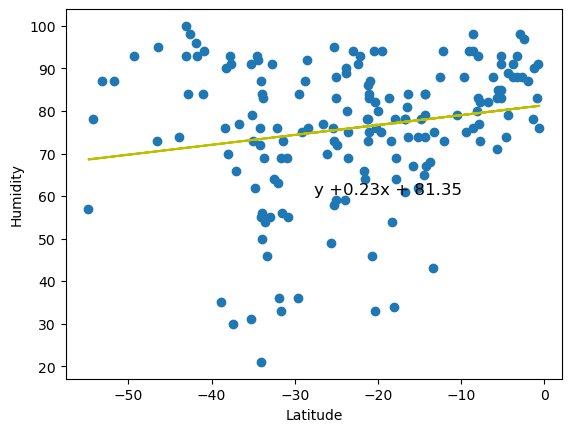

The r-value is: 0.19


In [28]:
# Southern Hemisphere
rvalue=lin_regres_func(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], ylabel="Humidity", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

### Cloudiness vs. Latitude Linear Regression Plot

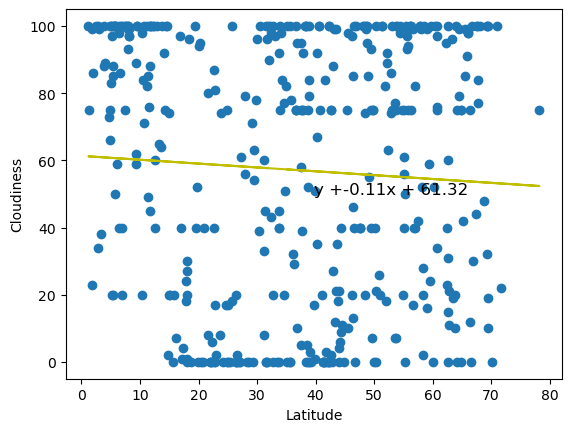

The r-value is: -0.06


In [25]:
# Northern Hemisphere
rvalue=lin_regres_func(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], ylabel="Cloudiness", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

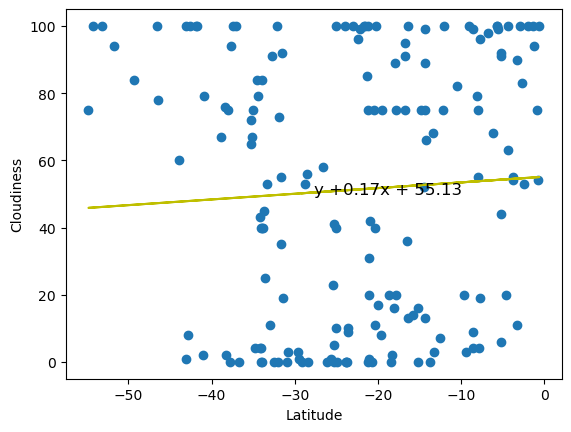

The r-value is: 0.06


In [26]:
# Southern Hemisphere
rvalue=lin_regres_func(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], ylabel="Cloudiness", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

### Wind Speed vs. Latitude Linear Regression Plot

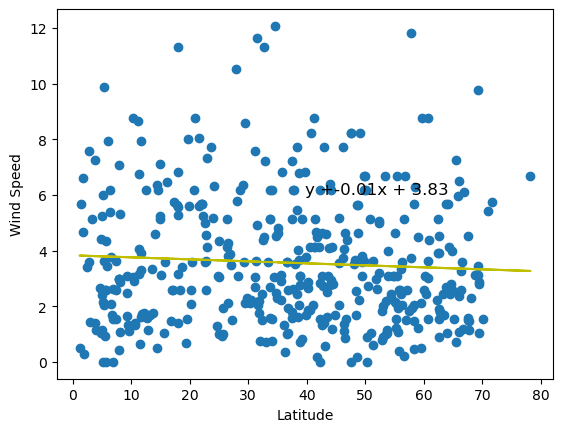

The r-value is: -0.06


In [29]:
# Northern Hemisphere
rvalue=lin_regres_func(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], ylabel="Wind Speed", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")

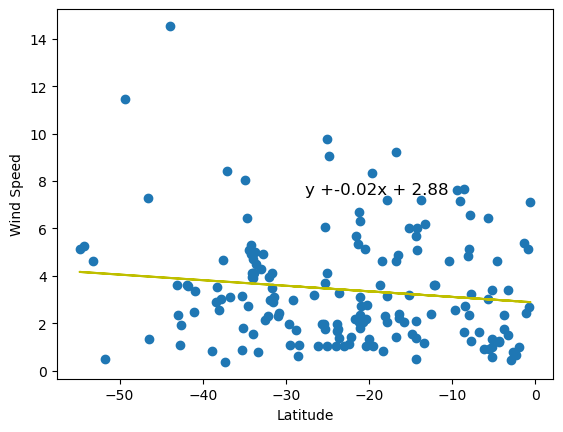

The r-value is: -0.13


In [30]:
# Southern Hemisphere
rvalue=lin_regres_func(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], ylabel="Wind Speed", xlabel="Latitude")
print(f"The r-value is: {round(rvalue, 2)}")